# Baseball Case Study

## Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.    

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors   

-- Output: Number of predicted wins (W)   

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [ ]:
# Importing required liabrary 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline

In [18]:
# Import data set
bb = pd.read_csv(r"E:\Flip Robo\Data\baseball.csv")
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
# Check shape of data 
bb.shape

(30, 17)

# EXPLORATORY DATA ANALYTICS (EDA) :

In [38]:
bb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
# Publish Required information 
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [19]:
# Check null values
bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

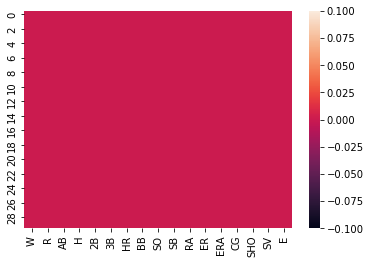

In [40]:
sns.heatmap(bb.isnull())

There is No null values are present

In [23]:
bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


- I can observe that all the columns have the count value of 30 there are no negative values and Few columns have very low values in it and few have very high values in the datset.

## Data Vizualization

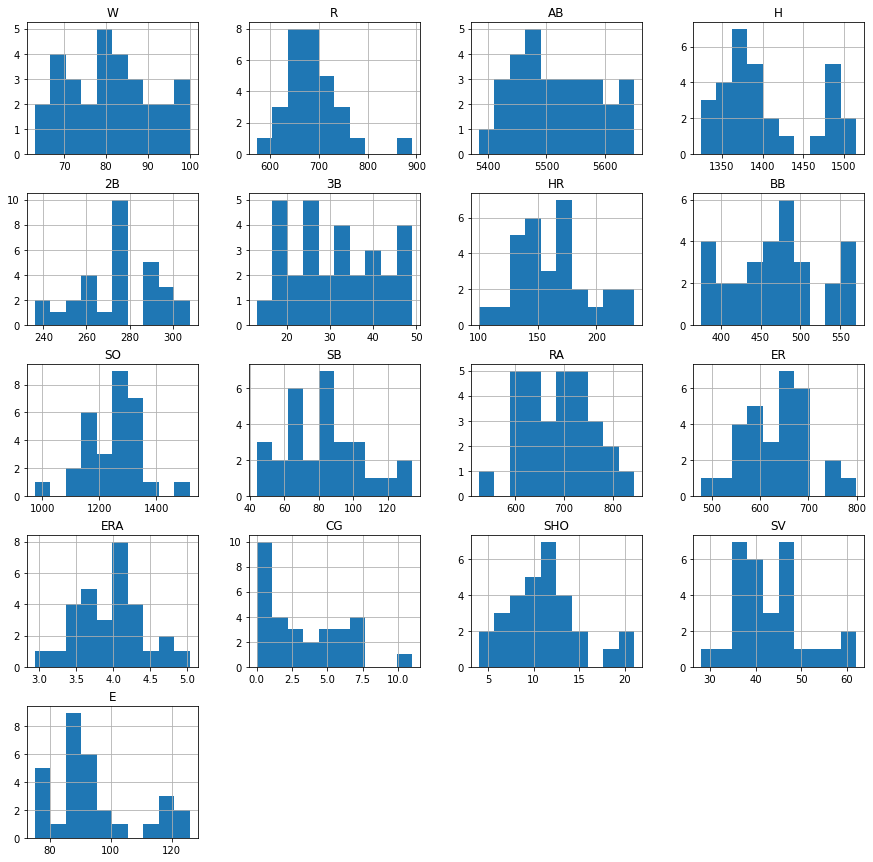

In [88]:
bb.hist(figsize=(15,15));

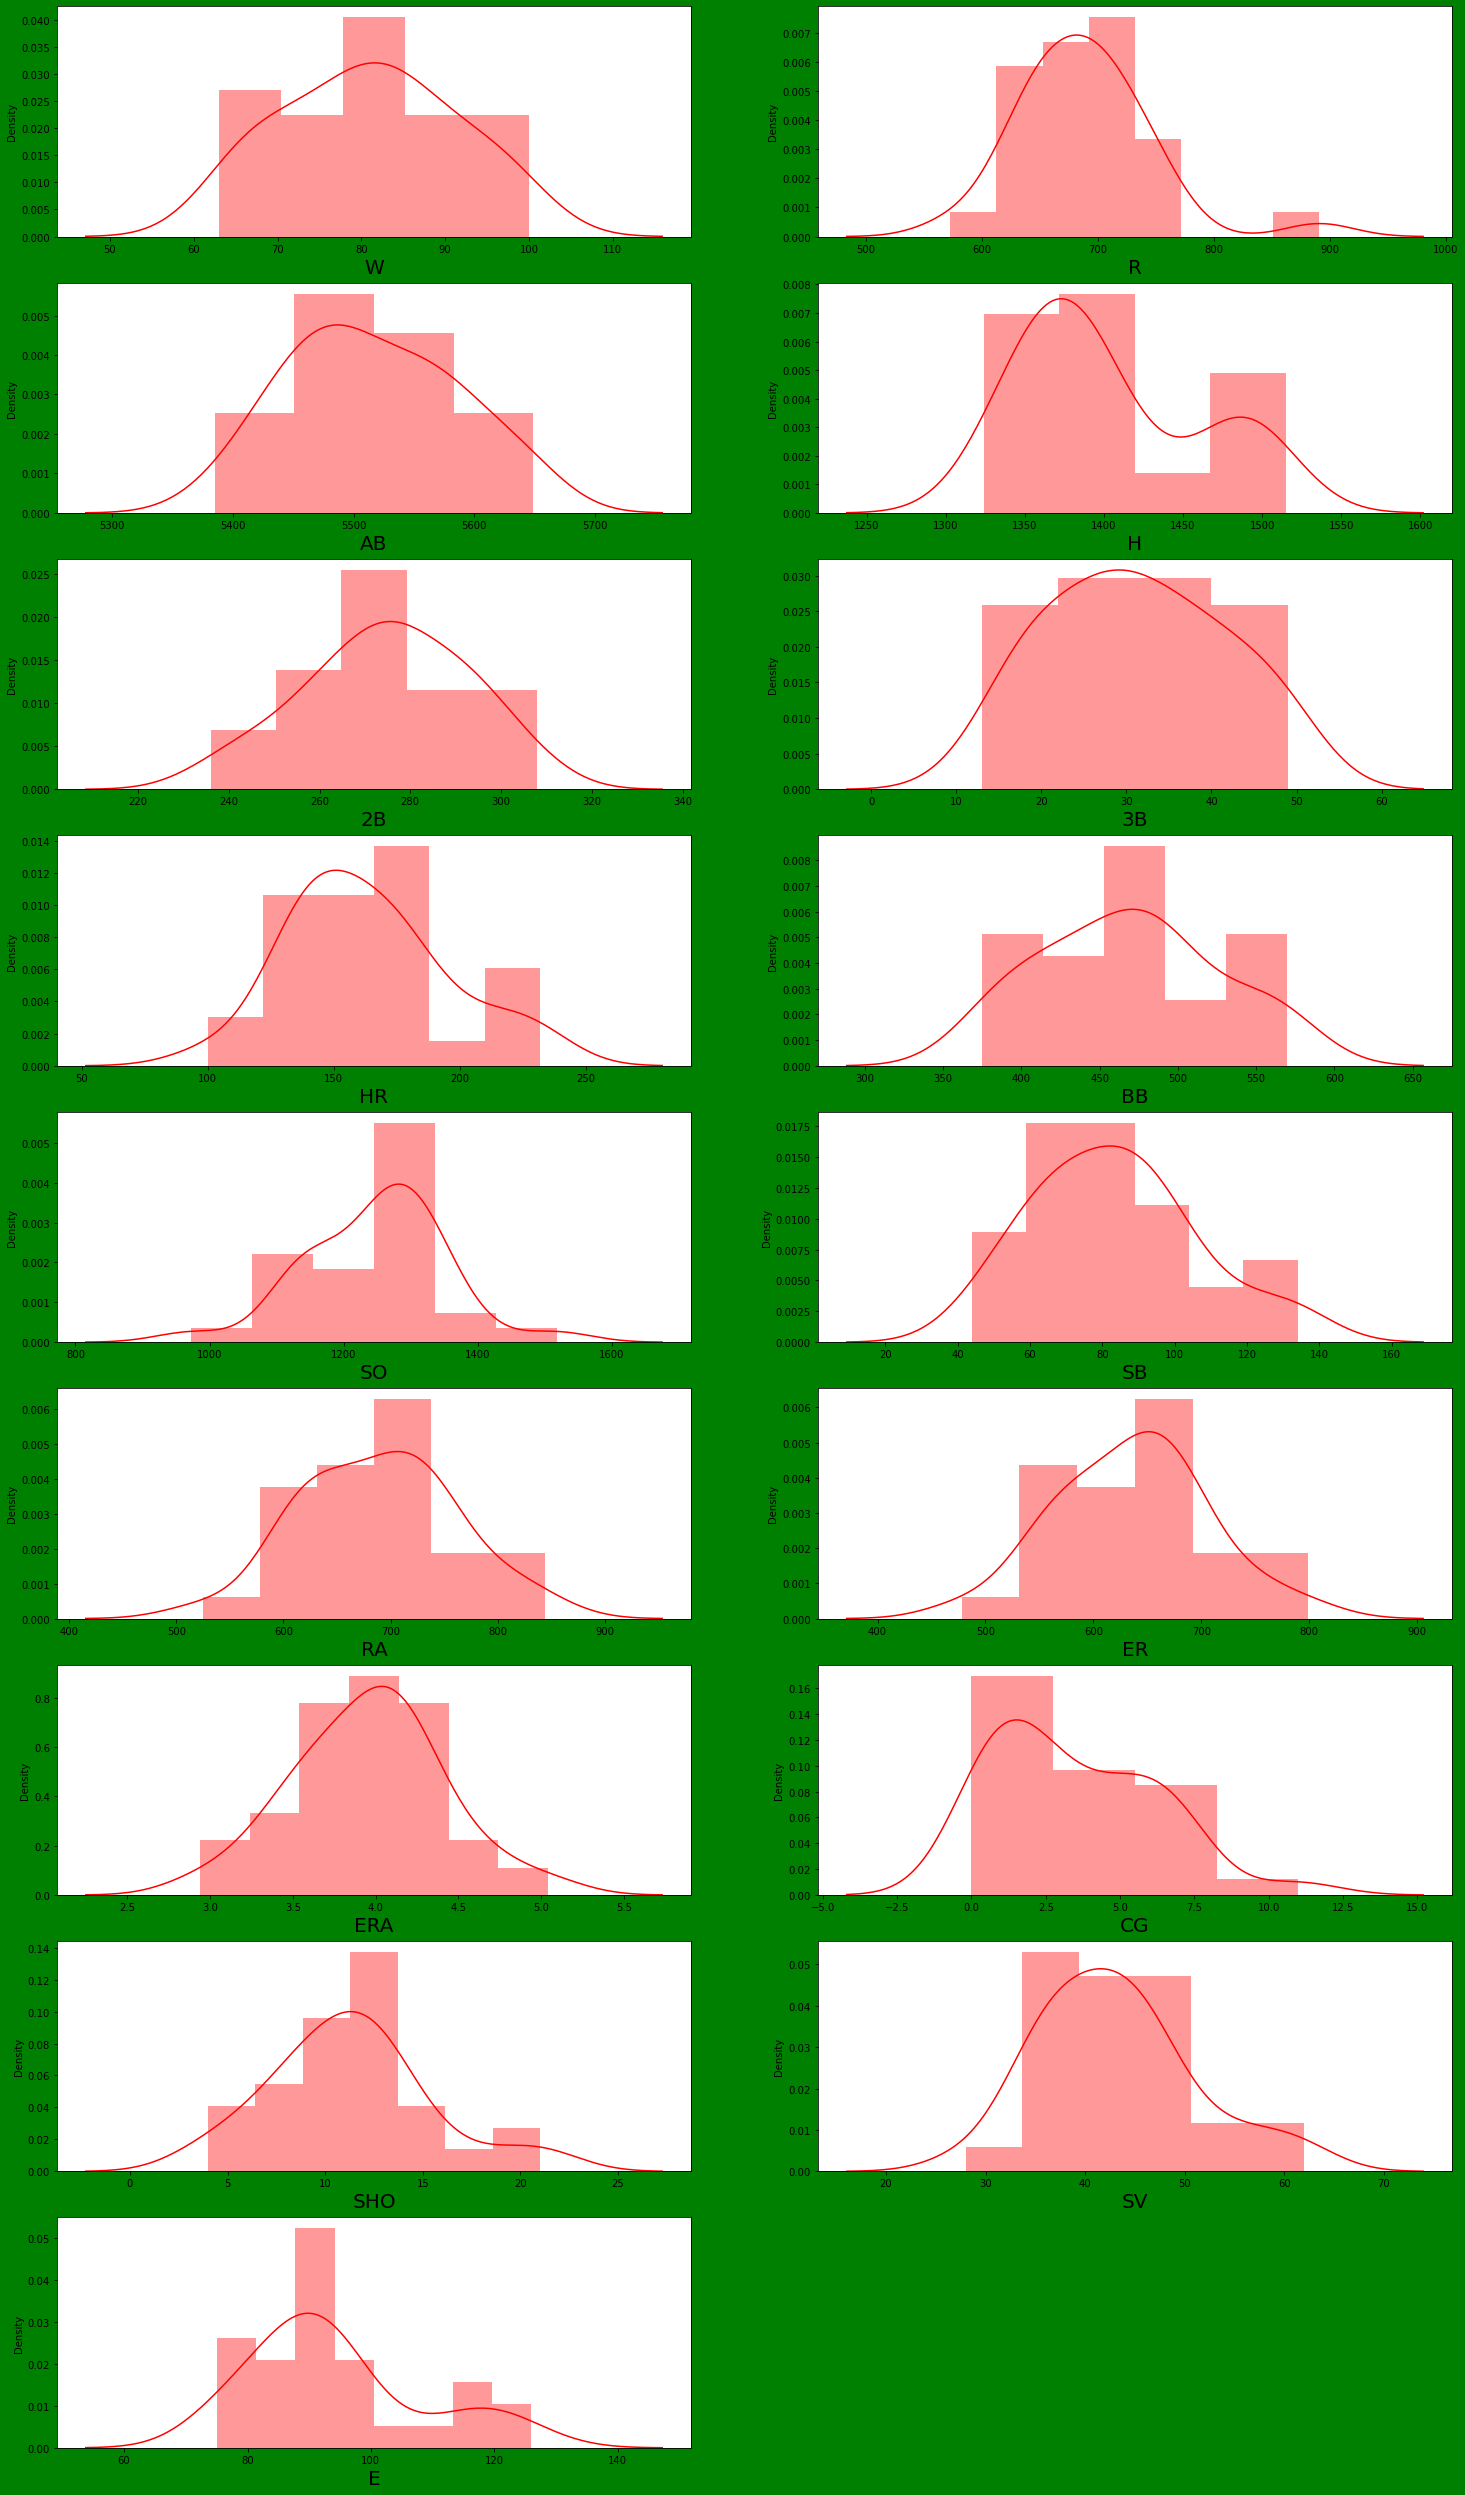

In [84]:
#Distribution of the data
plt.figure(figsize = (25,50), facecolor = 'green')
plotnumber = 1

for column in bb:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(bb[column], color = 'red')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

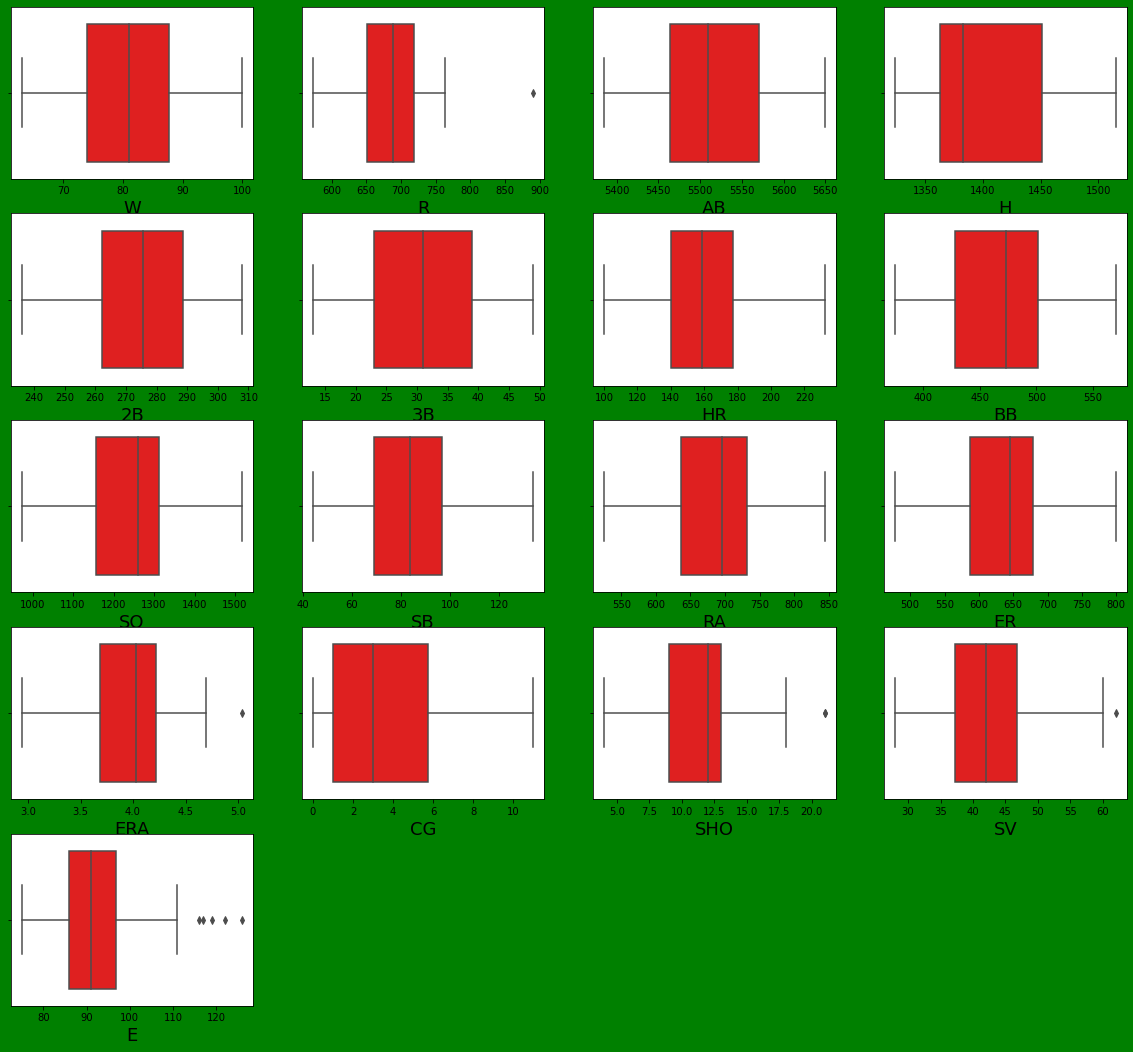

In [76]:
# Checking for outliers
plt.figure(figsize = (20,45), facecolor = 'green')
plotnumber = 1
for column in bb:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.boxplot(bb[column], color = 'red')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

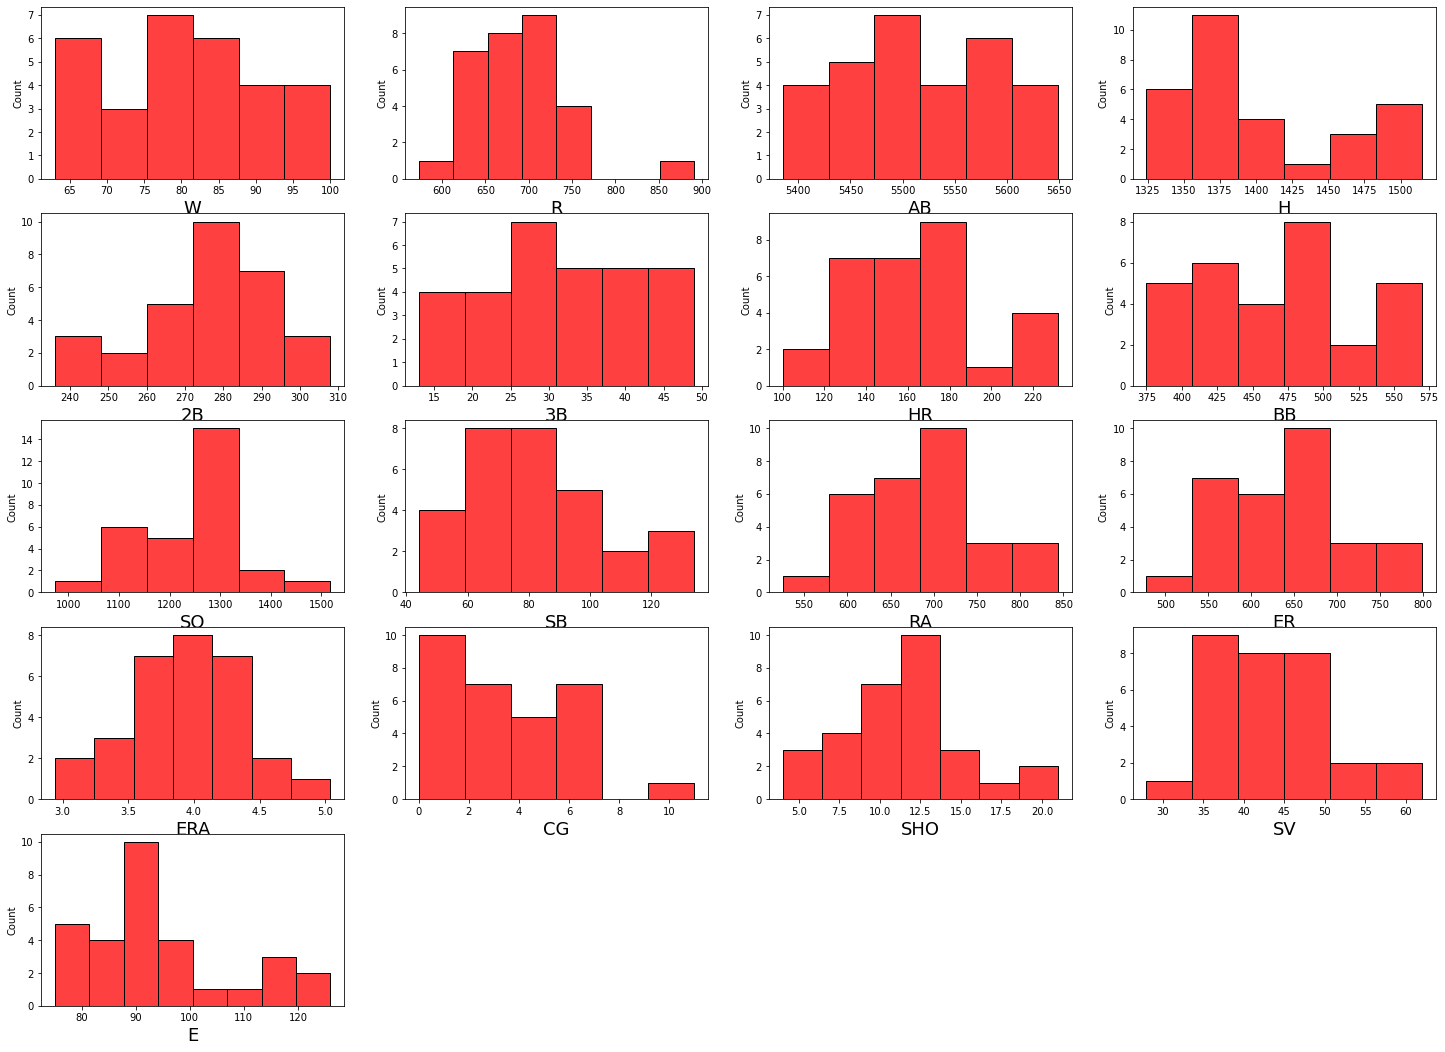

In [86]:
plt.figure(figsize = (25,45), facecolor = 'white')
plotnumber = 1
for column in bb:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.histplot(bb[column], color = 'red')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

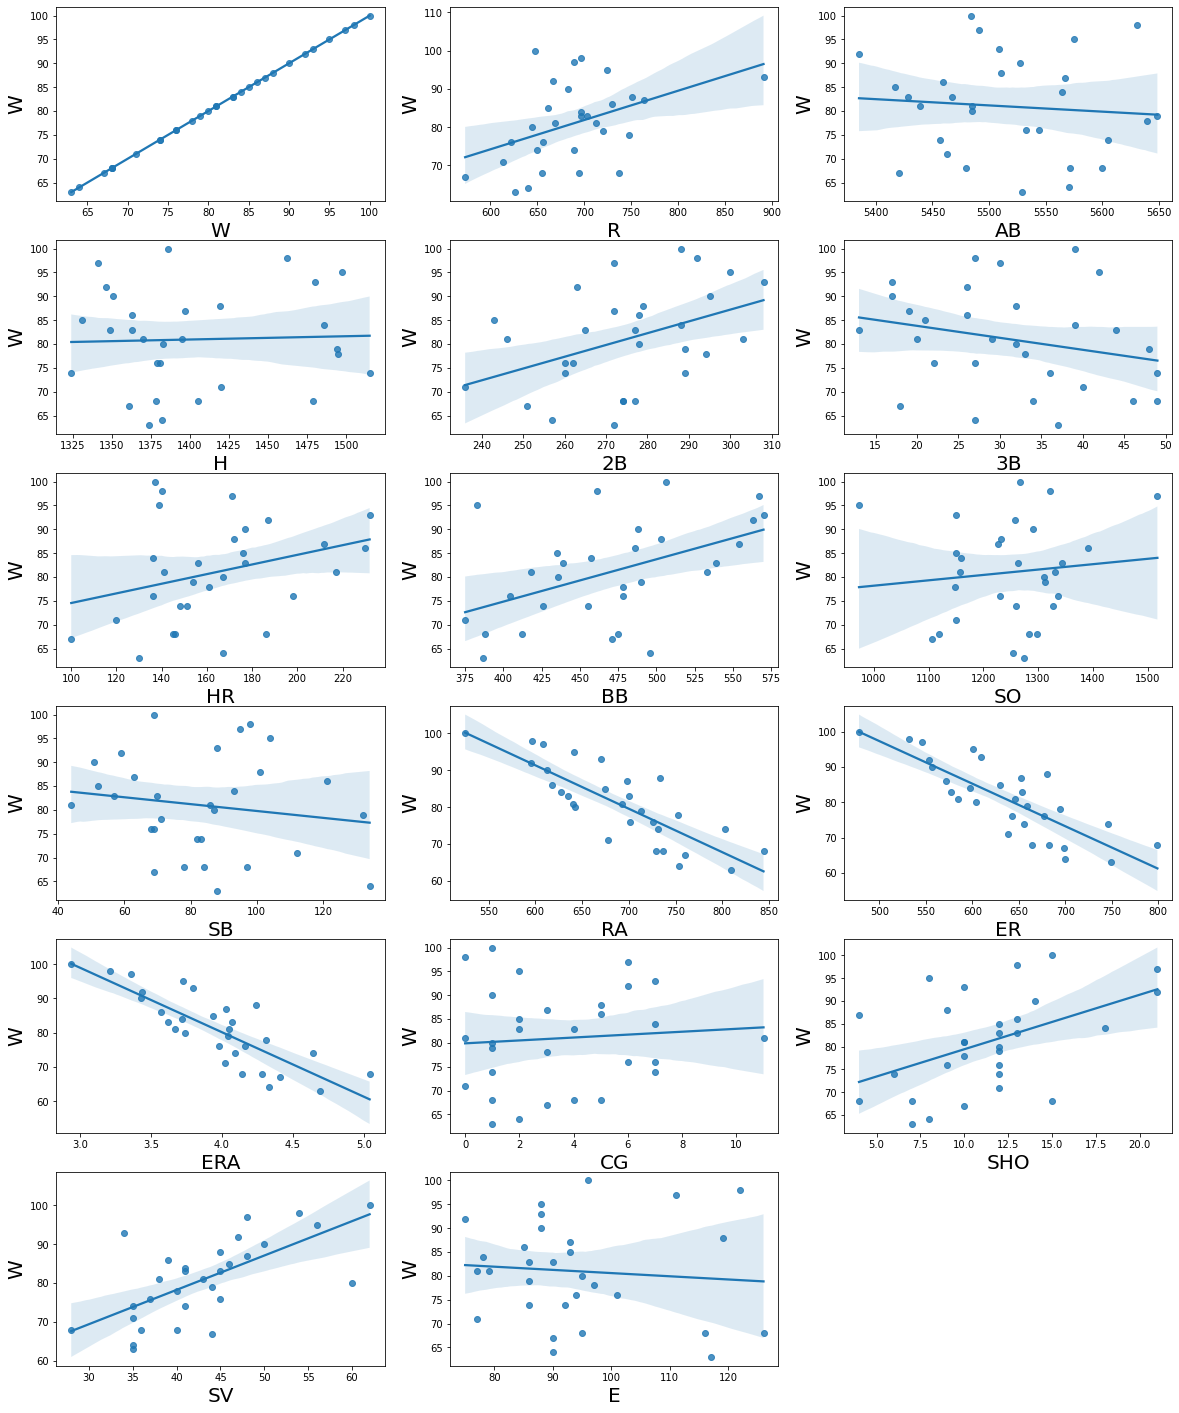

In [108]:
# Vizualising the replationship between features and target
plt.figure(figsize =(20,25), facecolor='white')
plotnumber = 1

for column in bb:
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.regplot(y=bb['W'],x= bb[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W',fontsize=20)
    plotnumber +=1
plt.show()

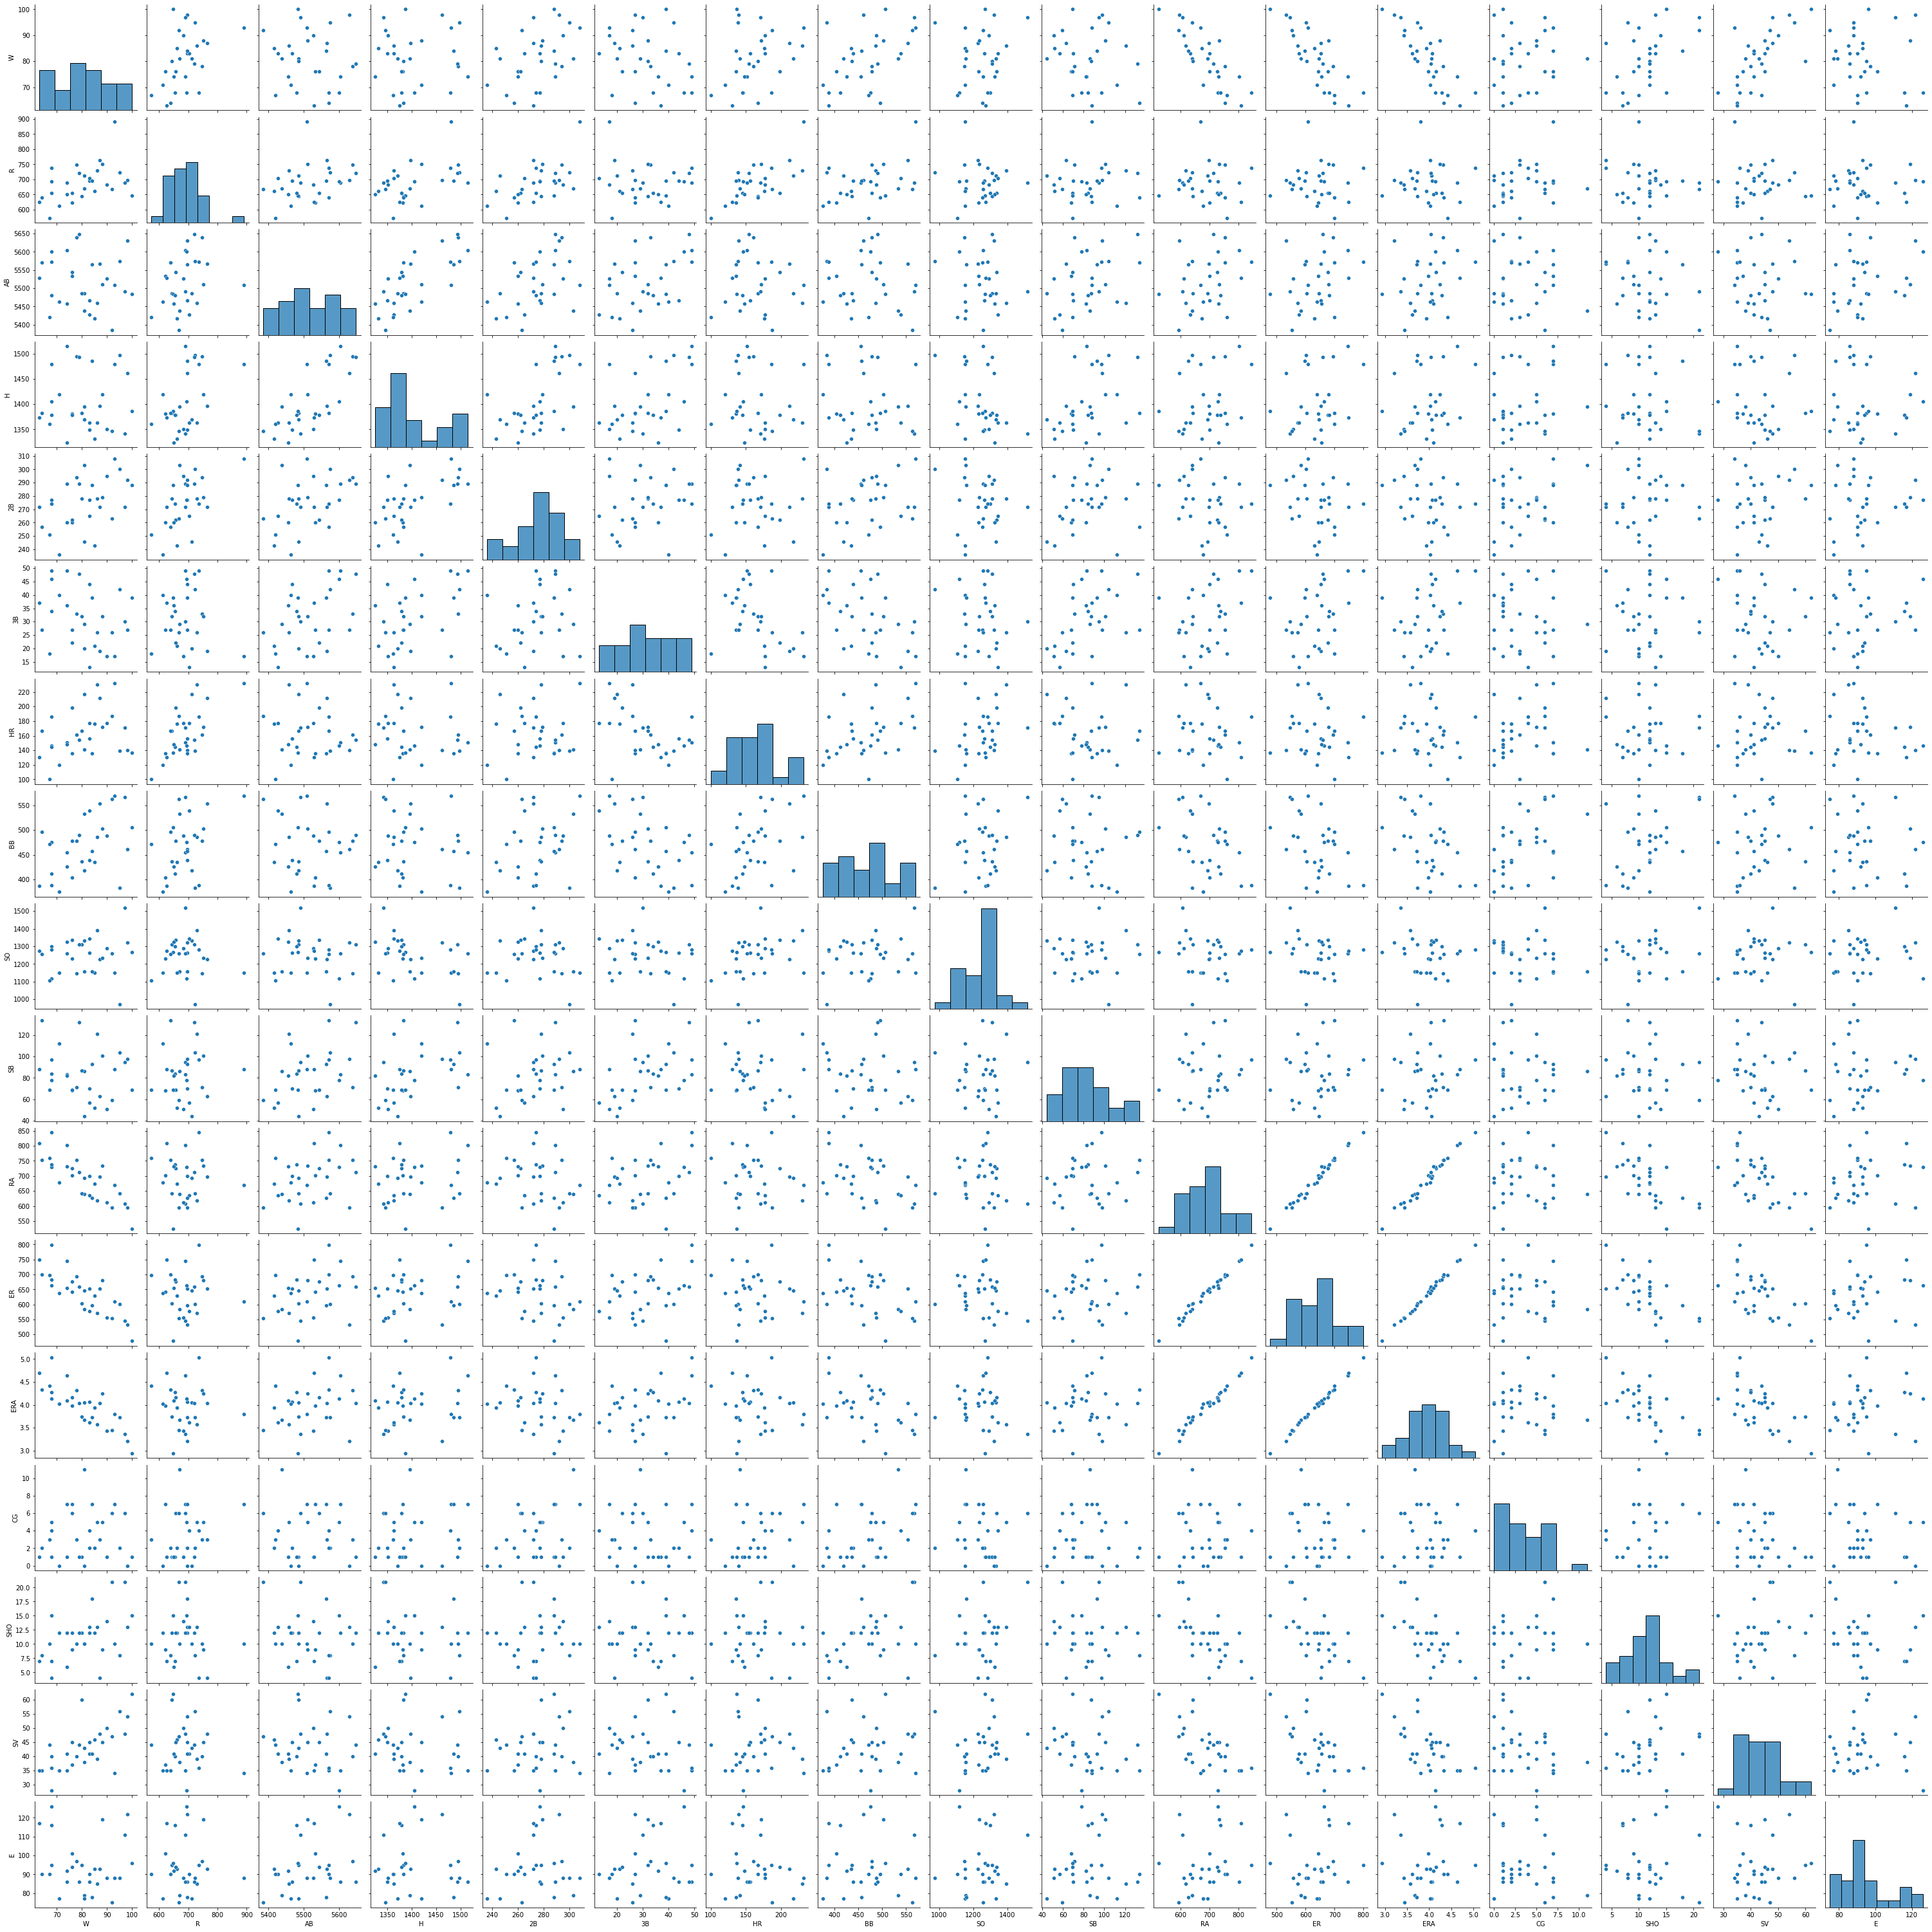

In [93]:
sns.pairplot(bb)
plt.show()

# Top Team 

In [99]:
# Top Team of wins in ascending order 
Top_teams = bb.sort_values(by=['W'],ascending= False)


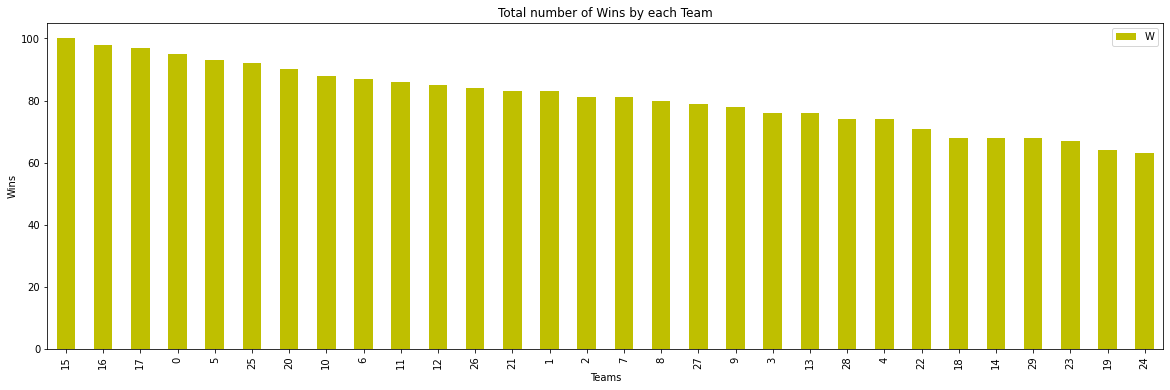

In [102]:
Top_teams.plot(y='W',kind= 'bar', color= 'y',figsize=(20,6))
plt.title('Total number of Wins by each Team')               
plt.xlabel('Teams',)
plt.ylabel('Wins')
plt.show()

In [105]:
# Number of wins in top10 teams
Top10 =Top_teams[:10]
Top10['RA']


15    525
16    596
17    608
0     641
5     670
25    595
20    613
10    733
6     698
11    618
Name: RA, dtype: int64

<AxesSubplot:>

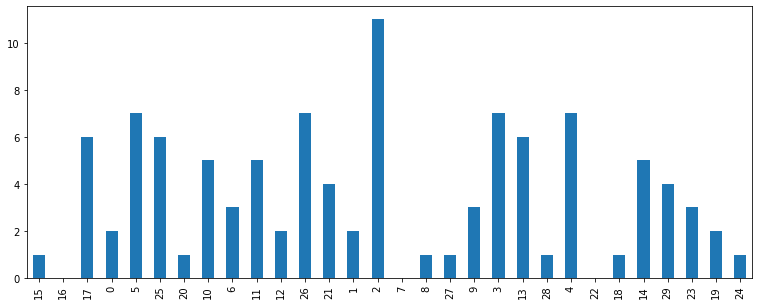

In [109]:
# Graphs for Top Teams 
plt.figure(figsize=(13,5))

Top_teams['CG'].plot( kind='bar')

Positive correlation :There is a a positive relationship between Win and Saves(SV)
Negative correlation: seen between RA-Win,Er-Win,ERA-Win

## Correlation 

In [110]:
bb.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

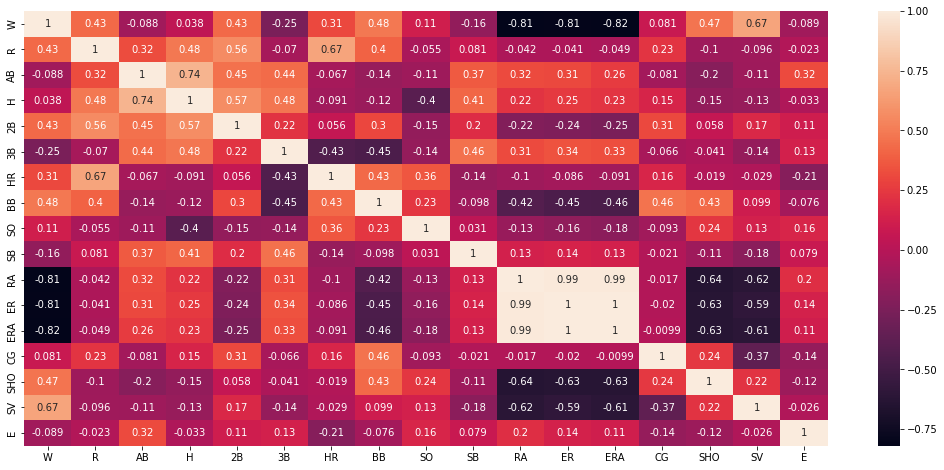

In [117]:
plt.figure(figsize=(18,8))
sns.heatmap(data=bb.corr(),annot=True)

- On analyzing the heatmap, there are few cases where the collinearity is high between the features   
- We need to analyse further to see if its a case of mullticollinearity or not.   
- If it is we would require to drop few of the features.

In [112]:
bb.drop('W',axis= 1).corrwith(bb.W).sort_values(ascending= False)

SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
dtype: float64

#### Visualise the correlation

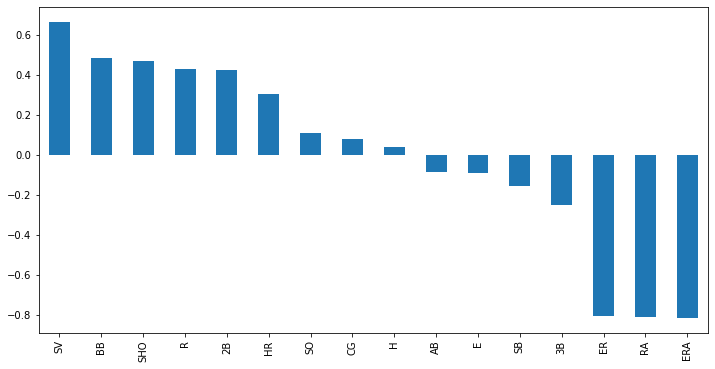

In [115]:
bb.drop('W',axis= 1).corrwith(bb.W).sort_values(ascending= False).plot(kind='bar', figsize = (12,6))
plt.show()

- Here we can study the features that share correlation with the target. 
- As obsevered earlier in regplot, Saves share the highest positive correlation and ERA highest negative correlation. 
- Hits seems to contribute less to Wins as its value is close to 0.

## Data Preprocessing

<AxesSubplot:>

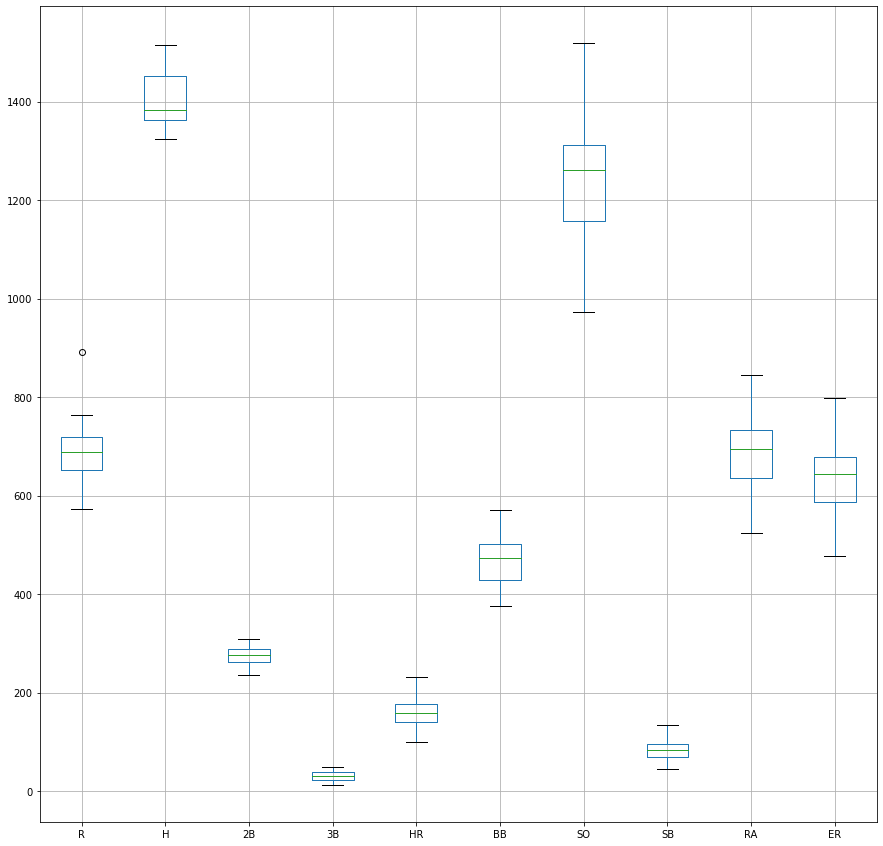

In [122]:
# let check the outlier as well in the dataset 
bb.drop(columns =["AB","W","ERA","CG","SHO","SV","E"]).boxplot(figsize=(15,15))

#### Removing outliers

In [123]:
from scipy.stats import zscore

In [129]:
a=bb[['R','ERA', 'SHO', 'SV', 'E']]


In [130]:
z=np.abs(zscore(x))

In [131]:
df=bb[(z<3).all(axis=1)]
df.shape

(29, 17)

- we have removed the outliers whose zscore is less than 3

In [132]:
X=df.drop(['W','H'],axis=1)

In [133]:
y=df['W']

In [134]:
X.skew()

R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

- skewness needs to be treated as we can see values greater than +/-0.5

In [135]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

In [136]:
i = [ 'CG', 'SHO', 'SV', 'E']
X[i]= scaler.fit_transform(X[i].values)
X.skew()

R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

- skewness is mostly treated

### Scaling the data

In [137]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled= scalar.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled,columns=X.columns)
X_scaled

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


In [138]:
x= X_scaled 

## Training the model


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [140]:
#Finding the best random state

MaxAcc = 0
MaxRS =0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr_train= lr.predict(x_train)
    predlr_test= lr.predict(x_test)
    acc= r2_score(y_test,predlr_test)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRS= i
    print(f'At random state {i}, the training accuracy is: {r2_score(y_train,predlr_train)}')
    print(f'At random state {i}, the testing accuracy is: {r2_score(y_test,predlr_test)}')
    print('/n')


At random state 1, the training accuracy is: 0.9827010207558656
At random state 1, the testing accuracy is: 0.39150210158084287
/n
At random state 2, the training accuracy is: 0.9590166646445036
At random state 2, the testing accuracy is: 0.2843579271715866
/n
At random state 3, the training accuracy is: 0.9697049838353199
At random state 3, the testing accuracy is: 0.6126073903077536
/n
At random state 4, the training accuracy is: 0.9799608718217944
At random state 4, the testing accuracy is: -4.511564805946489
/n
At random state 5, the training accuracy is: 0.9669278321461263
At random state 5, the testing accuracy is: 0.6111737921155511
/n
At random state 6, the training accuracy is: 0.9740709739050545
At random state 6, the testing accuracy is: 0.7171960789047073
/n
At random state 7, the training accuracy is: 0.9642562195327278
At random state 7, the testing accuracy is: 0.1397370069845213
/n
At random state 8, the training accuracy is: 0.968414361025638
At random state 8, the tes

At random state 74, the training accuracy is: 0.9944769583939624
At random state 74, the testing accuracy is: -0.2664328534628686
/n
At random state 75, the training accuracy is: 0.9738727335277756
At random state 75, the testing accuracy is: -0.198688760486607
/n
At random state 76, the training accuracy is: 0.9661793714616418
At random state 76, the testing accuracy is: 0.7234415768243311
/n
At random state 77, the training accuracy is: 0.9730651159523401
At random state 77, the testing accuracy is: -0.4525244058549218
/n
At random state 78, the training accuracy is: 0.9601633788190946
At random state 78, the testing accuracy is: 0.5523028758509029
/n
At random state 79, the training accuracy is: 0.9790156363801932
At random state 79, the testing accuracy is: 0.14741599040123843
/n
At random state 80, the training accuracy is: 0.9963733290031278
At random state 80, the testing accuracy is: -1.0886151396411048
/n
At random state 81, the training accuracy is: 0.9746866929960223
At rand

At random state 146, the training accuracy is: 0.9603517219258455
At random state 146, the testing accuracy is: 0.3419446496805837
/n
At random state 147, the training accuracy is: 0.9785952141080665
At random state 147, the testing accuracy is: 0.32712418687123856
/n
At random state 148, the training accuracy is: 0.9618351226775229
At random state 148, the testing accuracy is: 0.8101303321224816
/n
At random state 149, the training accuracy is: 0.9692465574287988
At random state 149, the testing accuracy is: 0.741990044802603
/n
At random state 150, the training accuracy is: 0.9781556173856443
At random state 150, the testing accuracy is: 0.6619052686164146
/n
At random state 151, the training accuracy is: 0.9561423354092272
At random state 151, the testing accuracy is: 0.6197262007699025
/n
At random state 152, the training accuracy is: 0.9708036314822868
At random state 152, the testing accuracy is: 0.673101998651776
/n
At random state 153, the training accuracy is: 0.97230501139162

At random state 210, the training accuracy is: 0.9860946224266806
At random state 210, the testing accuracy is: -0.22336838307437312
/n
At random state 211, the training accuracy is: 0.9926952784916955
At random state 211, the testing accuracy is: -0.6887398349246818
/n
At random state 212, the training accuracy is: 0.984244521001873
At random state 212, the testing accuracy is: 0.4711365505614298
/n
At random state 213, the training accuracy is: 0.9821641351224721
At random state 213, the testing accuracy is: -1.6477568861292404
/n
At random state 214, the training accuracy is: 0.9736975281414484
At random state 214, the testing accuracy is: 0.6656192970196538
/n
At random state 215, the training accuracy is: 0.9624006849650033
At random state 215, the testing accuracy is: -0.023899373086869957
/n
At random state 216, the training accuracy is: 0.9771008442442032
At random state 216, the testing accuracy is: 0.31112559764810843
/n
At random state 217, the training accuracy is: 0.963647

At random state 275, the testing accuracy is: -1.7924452438773737
/n
At random state 276, the training accuracy is: 0.959396670314634
At random state 276, the testing accuracy is: 0.6791834948900852
/n
At random state 277, the training accuracy is: 0.9744092734566769
At random state 277, the testing accuracy is: 0.4013287828429084
/n
At random state 278, the training accuracy is: 0.9767125721182407
At random state 278, the testing accuracy is: 0.3298301177398877
/n
At random state 279, the training accuracy is: 0.9806164989335715
At random state 279, the testing accuracy is: 0.5423287655329544
/n
At random state 280, the training accuracy is: 0.9545153667510134
At random state 280, the testing accuracy is: 0.7827425410008226
/n
At random state 281, the training accuracy is: 0.9675665310907985
At random state 281, the testing accuracy is: 0.1945865467415827
/n
At random state 282, the training accuracy is: 0.9860541422817626
At random state 282, the testing accuracy is: 0.49913667966971

At random state 341, the training accuracy is: 0.9754937771039717
At random state 341, the testing accuracy is: 0.5318231609665631
/n
At random state 342, the training accuracy is: 0.954148531159164
At random state 342, the testing accuracy is: 0.6054942306625852
/n
At random state 343, the training accuracy is: 0.962962736625695
At random state 343, the testing accuracy is: 0.8606785018613317
/n
At random state 344, the training accuracy is: 0.9654996340414396
At random state 344, the testing accuracy is: 0.4411821141867819
/n
At random state 345, the training accuracy is: 0.9813695350591561
At random state 345, the testing accuracy is: 0.5890928436060803
/n
At random state 346, the training accuracy is: 0.975137638142759
At random state 346, the testing accuracy is: 0.6130881172032948
/n
At random state 347, the training accuracy is: 0.9618764429915434
At random state 347, the testing accuracy is: 0.5683270315683422
/n
At random state 348, the training accuracy is: 0.9877319757504188

At random state 402, the testing accuracy is: 0.5431034074758156
/n
At random state 403, the training accuracy is: 0.9897207923668631
At random state 403, the testing accuracy is: -2.8954372755135784
/n
At random state 404, the training accuracy is: 0.9715816180321152
At random state 404, the testing accuracy is: 0.498261560257918
/n
At random state 405, the training accuracy is: 0.9778033062997995
At random state 405, the testing accuracy is: -2.120928200290914
/n
At random state 406, the training accuracy is: 0.9889278338680215
At random state 406, the testing accuracy is: 0.38224624698011966
/n
At random state 407, the training accuracy is: 0.9667889947110451
At random state 407, the testing accuracy is: 0.298230134540301
/n
At random state 408, the training accuracy is: 0.9880821491182492
At random state 408, the testing accuracy is: 0.4311553661661226
/n
At random state 409, the training accuracy is: 0.9418258001126432
At random state 409, the testing accuracy is: 0.77656082002951

At random state 464, the training accuracy is: 0.9640713628364127
At random state 464, the testing accuracy is: 0.6602116705674672
/n
At random state 465, the training accuracy is: 0.9786284109373452
At random state 465, the testing accuracy is: 0.7846856862424071
/n
At random state 466, the training accuracy is: 0.9790034481015765
At random state 466, the testing accuracy is: 0.19597473149392108
/n
At random state 467, the training accuracy is: 0.9825012675402018
At random state 467, the testing accuracy is: -0.6784771034516572
/n
At random state 468, the training accuracy is: 0.9980525472459512
At random state 468, the testing accuracy is: -3.0326507533086513
/n
At random state 469, the training accuracy is: 0.9721346553575033
At random state 469, the testing accuracy is: 0.7534770083235222
/n
At random state 470, the training accuracy is: 0.9660962753153335
At random state 470, the testing accuracy is: -3.1553874014174683
/n
At random state 471, the training accuracy is: 0.996778635

In [141]:
print('Maximum r2',MaxAcc,'Random state: ',MaxRS)

Maximum r2 0.911287583601639 Random state:  495


In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=495)


In [143]:
lr= LinearRegression()
lr.fit(x_train,y_train)

predlr_test= lr.predict(x_test)
print('r2 score', r2_score(y_test,predlr_test))
print('MAE', mean_absolute_error(y_test,predlr_test))
print('MSE',mean_squared_error(y_test,predlr_test))
print('RNSE',np.sqrt(mean_squared_error(y_test,predlr_test)))

r2 score 0.8651396242565652
MAE 3.6980356322140366
MSE 20.622399124100227
RNSE 4.541189175106035


In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
rf= RandomForestRegressor()
rf.fit(x_train,y_train)

predrf_test= rf.predict(x_test)
print('r2 score', r2_score(y_test,predrf_test))
print('MAE', mean_absolute_error(y_test,predrf_test))
print('MSE',mean_squared_error(y_test,predrf_test))
print('RNSE',np.sqrt(mean_squared_error(y_test,predrf_test)))



r2 score 0.6612229972752044
MAE 6.438333333333333
MSE 51.80465
RNSE 7.197544720250094


In [152]:
ada= AdaBoostRegressor()
ada.fit(x_train,y_train)

predada= ada.predict(x_test)
print('r2 score', r2_score(y_test,predada))
print('MAE', mean_absolute_error(y_test,predada))
print('MSE',mean_squared_error(y_test,predada))
print('RNSE',np.sqrt(mean_squared_error(y_test,predada)))

r2 score 0.6745007568876777
MAE 6.105555555555557
MSE 49.774259259259274
RNSE 7.055087473537041


In [153]:
gr= GradientBoostingRegressor()
gr.fit(x_train,y_train)

predgr= gr.predict(x_test)
print('r2 score', r2_score(y_test,predgr))
print('MAE', mean_absolute_error(y_test,predgr))
print('MSE',mean_squared_error(y_test,predgr))
print('RNSE',np.sqrt(mean_squared_error(y_test,predgr)))

r2 score 0.49704150686591264
MAE 8.03994689097434
MSE 76.9107362417542
RNSE 8.76987663777286


## Regularization

In [154]:
from sklearn.linear_model import Ridge
ridgeR= Ridge(alpha=1)
ridgeR.fit(x_train,y_train)
y_pred =ridgeR.predict(x_test)
print('r2 score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RNSE',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score 0.7921015301882257
MAE 4.720740858746019
MSE 31.791141008717158
RNSE 5.63836332712935


In [155]:
from sklearn.linear_model import Lasso
Lasso= Lasso(alpha=1)
Lasso.fit(x_train,y_train)
y_pred =Lasso.predict(x_test)
print('r2 score', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RNSE',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score 0.785128186814207
MAE 4.9471636214175305
MSE 32.85748143299418
RNSE 5.732144575374401


## Cross Validation

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
Test_accuracy =r2_score(y_test,y_pred)

for j in range(2,10):
    cv_score=cross_val_score(ridgeR,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At fold {j} the cv score is {cv_mean} and accuracy score for testing is {Test_accuracy} ')
    print('\n')

At fold 2 the cv score is 0.6972587676590749 and accuracy score for testing is 0.785128186814207 


At fold 3 the cv score is 0.5400920139159092 and accuracy score for testing is 0.785128186814207 


At fold 4 the cv score is 0.5961354365006589 and accuracy score for testing is 0.785128186814207 


At fold 5 the cv score is 0.44416049884768916 and accuracy score for testing is 0.785128186814207 


At fold 6 the cv score is 0.41874561303229996 and accuracy score for testing is 0.785128186814207 


At fold 7 the cv score is 0.2925811546052168 and accuracy score for testing is 0.785128186814207 


At fold 8 the cv score is 0.4385120833920909 and accuracy score for testing is 0.785128186814207 


At fold 9 the cv score is -6.327125544222607 and accuracy score for testing is 0.785128186814207 




In [158]:
a = cross_val_score(lr,x,y,cv=9)
print('Cross validation score of Logistic Regression',a.mean())

Cross validation score of Logistic Regression -13.029806602201736


In [159]:
b = cross_val_score(rf,x,y,cv=9)
print('Cross validation score of Random Forest Classifier',b.mean())


Cross validation score of Random Forest Classifier -11.018110555730217


Ridge was selected as the best model as it had better  r2 score and cross validation score

## Hyperparameter tuning

In [160]:
from sklearn.model_selection import GridSearchCV


In [161]:
params ={'alpha':(np.logspace(-8,8,100))}
ridgeR= Ridge(normalize= True)
ridge_model = GridSearchCV(ridgeR,params,cv=2)
ridge_model.fit(x_train,y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.8302175681319752}
0.7282139396208269


## Saving Model

In [162]:
import joblib

In [163]:
joblib.dump(ridge_model,'BaseballCaseStudy.pkl')

['BaseballCaseStudy.pkl']